# Proyek Klasifikasi Gambar Rock-Paper-Scissors



## Menyiapkan Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import os

## Preprocessing Data


In [2]:
training_dir = 'dataset/training/'
validation_dir = 'dataset/testing/'

In [3]:
training_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

training_generator = training_datagen.flow_from_directory(training_dir,
                                                    batch_size=126,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                                batch_size=128,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))


Found 2128 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


## Membuat Model

In [4]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


C:\Users\akmal\AppData\Local\Temp\ipykernel_11900\1528786134.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 12s 1us/step


In [5]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 6,354,499 (24.24 MB)

 Trainable params: 4,096,515 (15.63 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [9]:
int_lr = 1e-4
num_epochs = 10

optimizer = tf.optimizers.Adam(learning_rate=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


## Training Model

In [10]:
H = model.fit(training_generator,
              epochs=num_epochs,
              validation_data=validation_generator)


c:\Users\akmal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


c:\Users\akmal\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


17/17 ━━━━━━━━━━━━━━━━━━━━ 99s 5s/step - accuracy: 0.5776 - loss: 2.0343 - val_accuracy: 0.8833 - val_loss: 0.3416
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9179 - loss: 0.2154 - val_accuracy: 0.9500 - val_loss: 0.1420
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9558 - loss: 0.1136 - val_accuracy: 0.9500 - val_loss: 0.1836
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9588 - loss: 0.1137 - val_accuracy: 0.9833 - val_loss: 0.0750
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9661 - loss: 0.1045 - val_accuracy: 0.9833 - val_loss: 0.1023
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9712 - loss: 0.0788 - val_accuracy: 0.9833 - val_loss: 0.0762
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9793 - loss: 0.0578 - val_accuracy: 0.9667 - val_loss: 0.1016
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9815 - loss: 0.0620 - val_accuracy: 0.9833 - val_loss: 0.0602
Epo

## Evaluasi Model

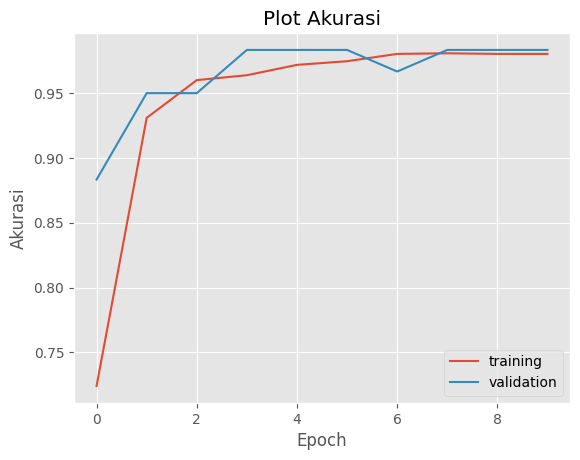

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.show()


## Menyimpan Model dalam Format SavedModel

In [15]:
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)


INFO:tensorflow:Assets written to: models/rps_model/1/assets


INFO:tensorflow:Assets written to: models/rps_model/1/assets
